# Heart disease prediction using different machine learning methods
<img src="http://centrus.com.br/wp-content/uploads/2019/09/problemas_cardiacos.jpg" width="1500" height="600">

In [1578]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
#############
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier  

#####
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
import pandas_profiling as pp
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression




## <span style="color:red">libraries to install for this project  </span>

In [1579]:
      
# pip install seaborn  
# pip install cufflinks
# pip install sklearn 
# pip install imblearn
# pip install scipy
# pip install pandas_profiling
#pip install -U imbalanced-learn

## Reading the data file
###### Data from kaggle, source: https://www.kaggle.com/johnsmith88/heart-disease-dataset

##### <span style="color:orange"> Understanding Features </span>

###### 1. age: displays the age of the individual.

###### 2. sex: displays the gender of the individual using the following format :

###### • 1 = male |  0 = female

###### 3. cp (Chest-Pain Type): displays the type of chest-pain experienced by the individual using the following format :

###### • 0 = typical angina | 1 = atypical angina | 2= non — anginal pain | 3 = asymptotic

###### 4. trestbps(Resting Blood Pressure): displays the resting blood pressure value of an individual in mmHg (unit)

###### 5. chol(Serum Cholestrol): displays the serum cholesterol in mg/dl (unit)

###### 6. fbs (Fasting Blood Sugar): compares an individual's fasting blood sugar value with 120mg/dl. |  • If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false)

###### 7. restecg (Resting ECG): displays resting electrocardiographic results • 0 = normal

###### • 1 = having ST-T wave abnormality |  2 = left ventricular hyperthrophy

###### 8. thalach(Max Heart Rate Achieved): displays the max heart rate achieved by an individual.

###### 9. exang (Exercise induced angina): 1 = yes | 0 = no

###### 10.oldpeak (ST depression induced by exercise relative to rest): displays the value of an integer or float.

###### 11.slope (Peak exercise ST segment) :  0 = upsloping | 1 = flat | 2 = downsloping

###### 12.ca (Number of major vessels (0–3) colored by fluoroscopy): displays the value as integer or float.

###### 13.thal: displays the thalassemia (is an inherited blood disorder that causes your body to have less hemoglobin than normal) : 0 = normal |  1 = fixed defect | 2 = reversible defect

###### 14.target (Diagnosis of heart disease): Displays whether the individual is suffering from heart disease or not : 0 = absence | 1 = present

In [1580]:
df = pd.read_csv('heart.csv')
dp=df.copy()

### Exploratory data analysis (EDA) 

In [1581]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [1582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [1583]:
df.isna().sum()
#bnsof fe kol featuesr the numbers of nulls

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [1584]:
df.shape

(1025, 14)

In [1585]:
#pp.ProfileReport(df)

c:\Users\Sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



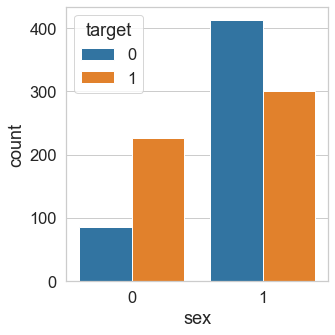

In [1586]:
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['sex'],hue=df["target"])
plt.tight_layout()

In [1587]:
# plt.figure(figsize=(3,3))
# sns.set_context('notebook',font_scale = 2.3)
# dp.drop('target', axis=1).corrwith(dp.target).plot(kind='bar', grid=True, figsize=(20, 10), 
#                                                         title="Correlation with the target feature")
# plt.tight_layout()

#### After obversving the Dataset report & the above graph :
##### 1) 526 patient have heart disease 
##### 2) 499 patient does not hace heart disease 
##### 2) Disease are more common in Males than Females

#### Notice : cp, thalach, slope are highly corrleted with target which mean they affect the result if the target
###### Target: 0 -> no disease , 1-> disease 
######  Sex: 0 -> Females, 1-> Males

### Outlier detection and removal

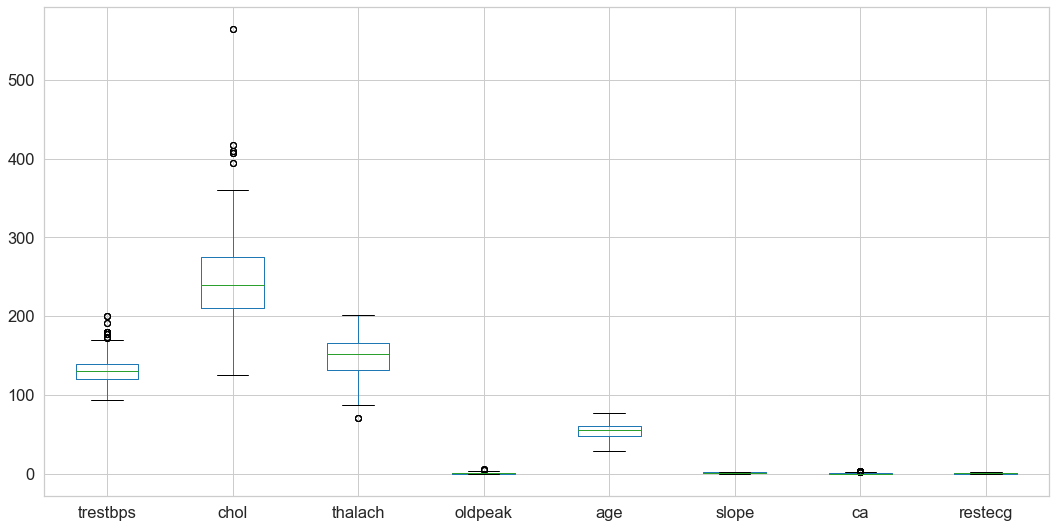

In [1588]:
import seaborn as sns
plt.figure(figsize=(18,9))
boxplot = df.boxplot(column=['trestbps','chol','thalach','oldpeak', 'age','slope','ca','restecg'])

In [1589]:
for x1 in ['trestbps']:
    q75,q25 = np.percentile(df.loc[:,x1],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x1] < min,x1] = np.nan
    df.loc[df[x1] > max,x1] = np.nan

In [1590]:
for x2 in ['chol']:
    q75,q25 = np.percentile(df.loc[:,x2],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x2] < min,x2] = np.nan
    df.loc[df[x2] > max,x2] = np.nan  

In [1591]:
for x3 in ['thalach']:
    q75,q25 = np.percentile(df.loc[:,x3],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x3] < min,x3] = np.nan
    df.loc[df[x3] > max,x3] = np.nan  

In [1592]:
for x4 in ['oldpeak']:
    q75,q25 = np.percentile(df.loc[:,x4],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x4] < min,x4] = np.nan
    df.loc[df[x4] > max,x4] = np.nan 

In [1593]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps    30
chol        16
fbs          0
restecg      0
thalach      4
exang        0
oldpeak      7
slope        0
ca           0
thal         0
target       0
dtype: int64

In [1594]:
df = df.dropna(axis = 0)

In [1595]:
for x5 in ['ca']:
    q75,q25 = np.percentile(df.loc[:,x5],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x5] < min,x5] = np.nan
    df.loc[df[x5] > max,x5] = np.nan 

In [1596]:
for x2 in ['chol']:
    q75,q25 = np.percentile(df.loc[:,x2],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x2] < min,x2] = np.nan
    df.loc[df[x2] > max,x2] = np.nan   

In [1597]:
df = df.dropna(axis = 0)

In [1598]:
for x2 in ['chol']:
    q75,q25 = np.percentile(df.loc[:,x2],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x2] < min,x2] = np.nan
    df.loc[df[x2] > max,x2] = np.nan    

In [1599]:
df = df.dropna(axis = 0)

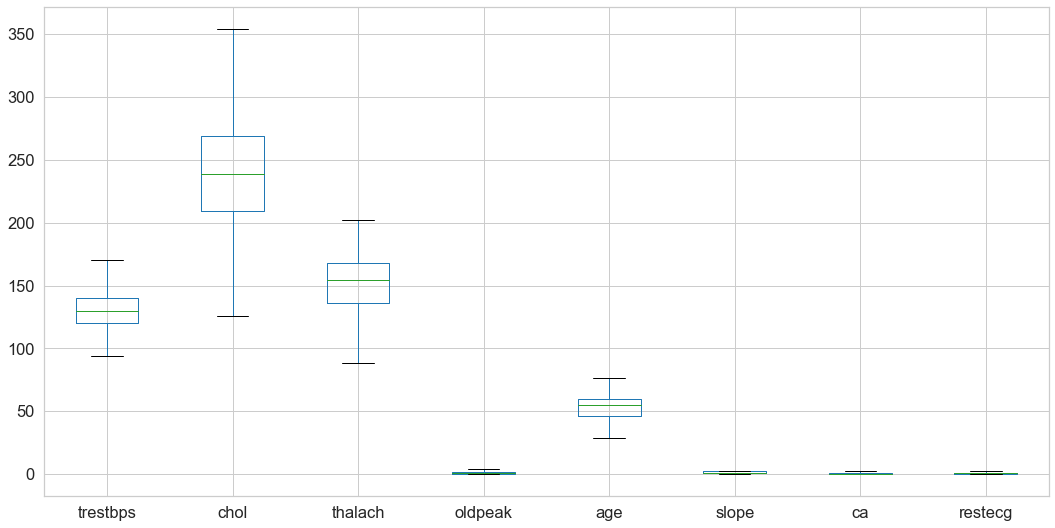

In [1600]:
plt.figure(figsize=(18,9))
boxplot = df.boxplot(column=['trestbps','chol','thalach','oldpeak', 'age','slope','ca','restecg'])

In [1601]:
df2=df.copy()
df3=df.copy()
df4=df.copy()

### correlation 

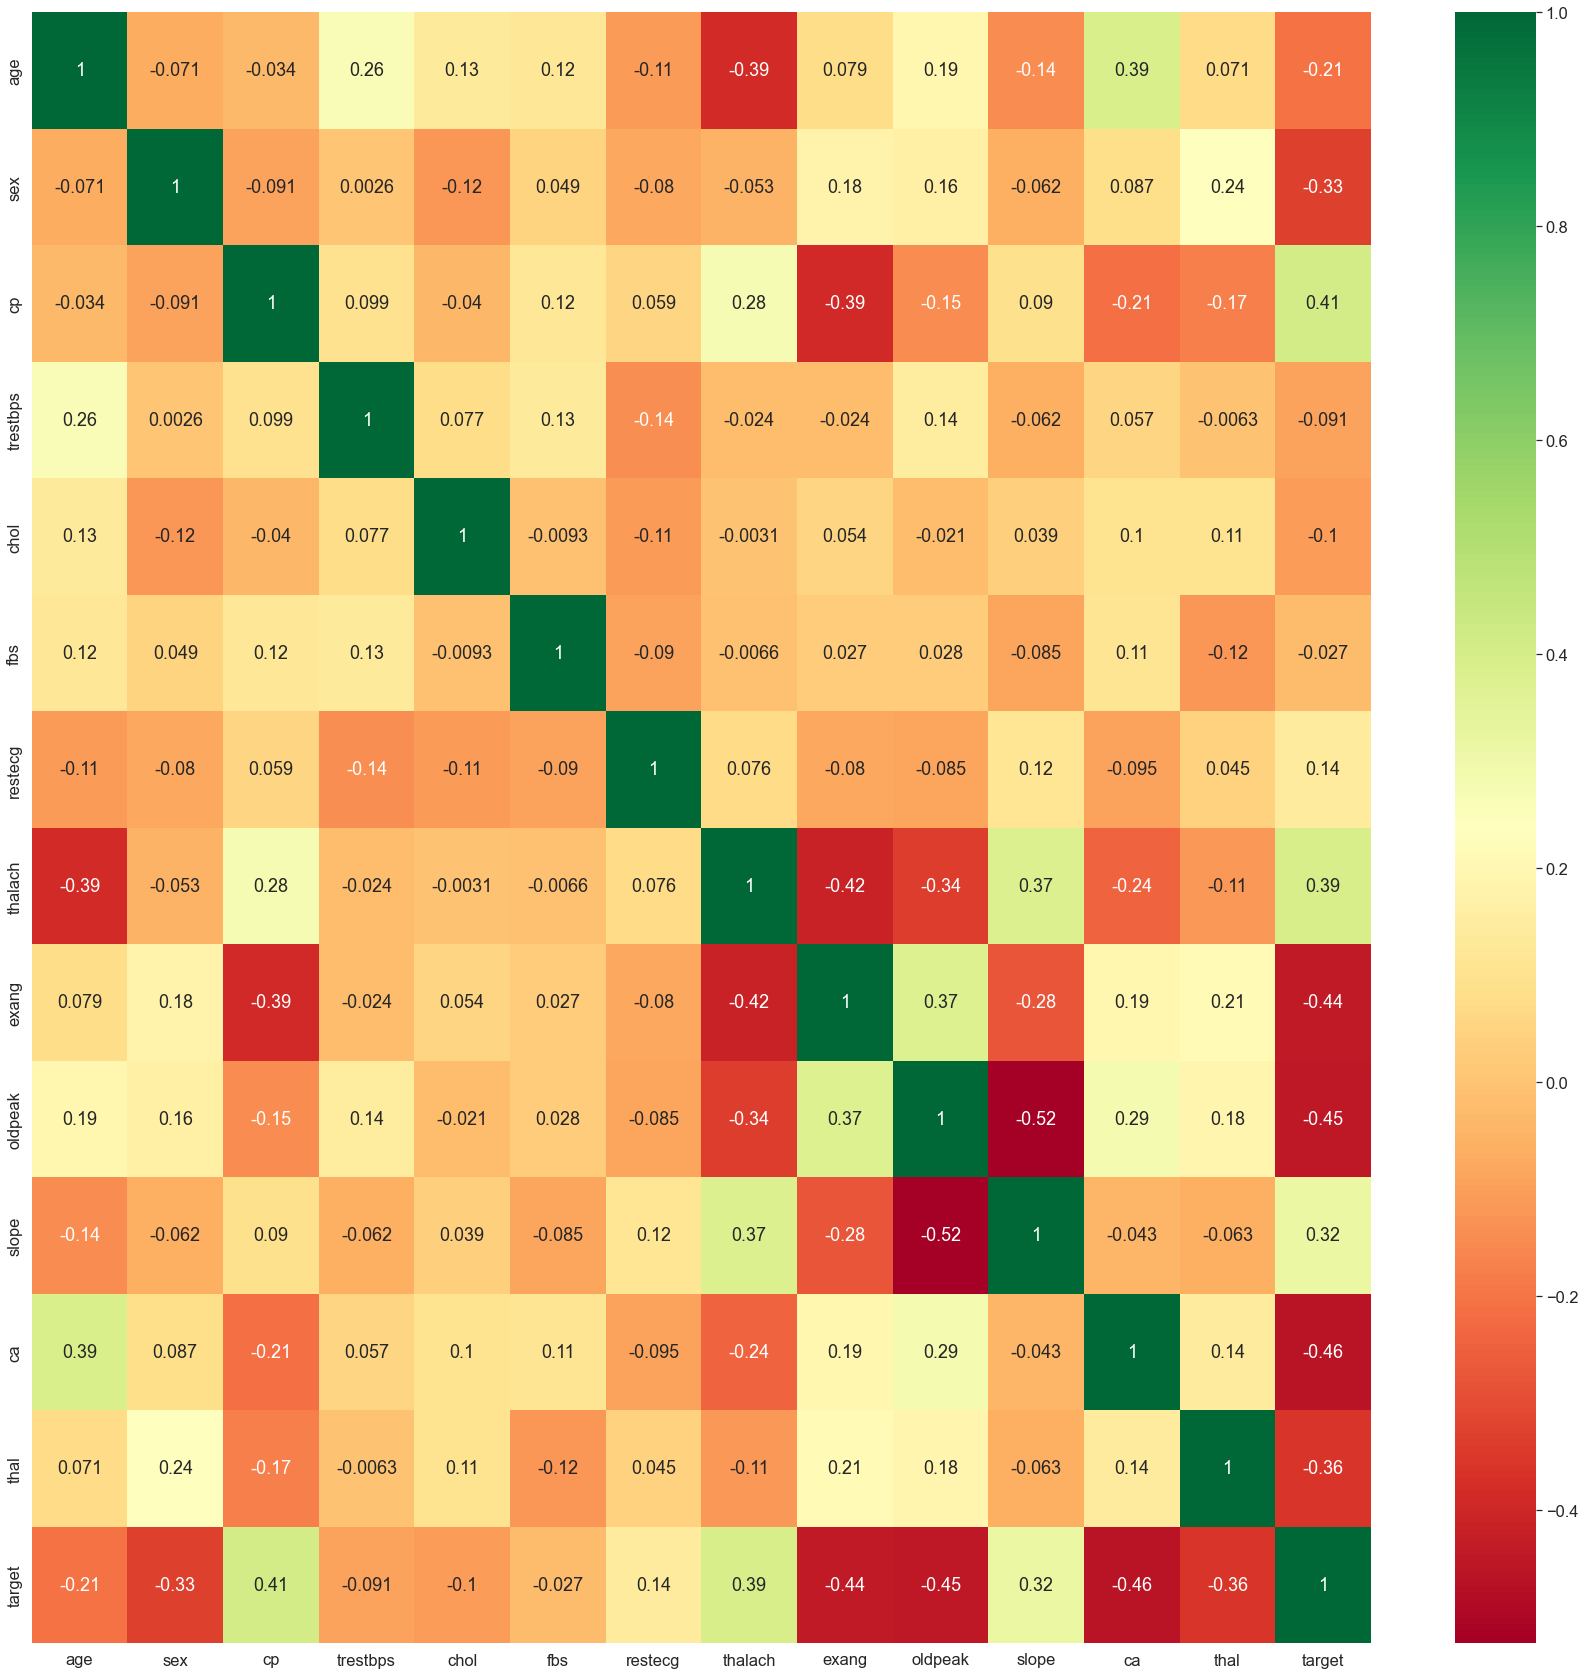

In [1602]:
corrmatrix=df.corr()
top_features=corrmatrix.index
plt.figure(figsize=(30,30))
result=sns.heatmap(df[top_features].corr(), annot=True, cmap="RdYlGn")

### Data Split

In [1603]:
x_naivebayes_dep= df3.drop(columns=['target'], axis=1)
y_naivebayes_dep= df3.target
x_rfe=df4.drop(columns=['target'], axis=1)
y_rfe=df4.target


In [1604]:
#Remove the highly corr features for naive bayes
x_naivebayes= df2.drop(columns=['target','slope','cp','thalach'], axis=1)
y_naivebayes= df2.target

In [1605]:
categorical_val = []
continous_val = []
for column in df.columns:
    print("--------------------")
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)


--------------------
age : [52 53 70 61 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64 41
 66 48 29 37 47 62 68 65 76 40 39 69 49 35 38 74]
--------------------
sex : [1 0]
--------------------
cp : [0 1 2 3]
--------------------
trestbps : [125. 140. 145. 148. 100. 160. 120. 122. 112. 132. 118. 128. 124. 106.
 104. 135. 130. 136. 129. 150. 138. 146. 117. 152. 154. 170. 134. 144.
 108. 123. 110. 142. 126.  94. 115. 102. 105. 155. 164. 156. 101.]
--------------------
chol : [212. 203. 174. 248. 289. 249. 286. 149. 341. 210. 204. 308. 266. 244.
 211. 185. 223. 208. 252. 209. 307. 233. 319. 256. 169. 131. 269. 196.
 231. 213. 271. 263. 229. 258. 330. 342. 226. 278. 230. 283. 241. 193.
 245. 232. 299. 288. 197. 315. 215. 326. 207. 177. 257. 255. 187. 201.
 220. 268. 267. 236. 303. 282. 126. 309. 186. 275. 281. 206. 335. 218.
 254. 295. 260. 240. 302. 192. 225. 235. 274. 234. 182. 167. 172. 298.
 321. 300. 199. 157. 222. 184. 354. 160. 247. 239. 246. 293. 180. 250.
 221. 318. 200.

In [1606]:
categorical_val.remove('target')
categorical_val.remove('sex')
categorical_val.remove('ca')
categorical_val.remove('exang')
df = pd.get_dummies(df, columns = categorical_val)

### Dummy variables

In [1607]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'target'})
cat_cols.sort()

In [1608]:
x= df.drop(columns='target', axis=1)
y= df.target
#####
x1= x.copy()
y1= y.copy()
###
x2= x.copy()
y2= y.copy()
####
x3= x.copy()
y3= y.copy()

In [1609]:
print(x)

      age  sex  trestbps   chol  thalach  exang  oldpeak   ca  cp_0  cp_1  \
0      52    1     125.0  212.0    168.0      0      1.0  2.0     1     0   
1      53    1     140.0  203.0    155.0      1      3.1  0.0     1     0   
2      70    1     145.0  174.0    125.0      1      2.6  0.0     1     0   
3      61    1     148.0  203.0    161.0      0      0.0  1.0     1     0   
5      58    0     100.0  248.0    122.0      0      1.0  0.0     1     0   
...   ...  ...       ...    ...      ...    ...      ...  ...   ...   ...   
1020   59    1     140.0  221.0    164.0      1      0.0  0.0     0     1   
1021   60    1     125.0  258.0    141.0      1      2.8  1.0     1     0   
1022   47    1     110.0  275.0    118.0      1      1.0  1.0     1     0   
1023   50    0     110.0  254.0    159.0      0      0.0  0.0     1     0   
1024   54    1     120.0  188.0    113.0      0      1.4  1.0     1     0   

      ...  restecg_0  restecg_1  restecg_2  slope_0  slope_1  slope_2  thal

### Split x and Y

In [1610]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
##################
y_train_knn=y_train.copy()
y_test_knn=y_test.copy()
######
y_train_dt=y_train.copy()
y_test_dt=y_test.copy()

In [1611]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
###########
x_train_knn=x_train.copy()
x_test_knn=x_test.copy()
#####
x_train_dt=x_train.copy()
x_test_dt=x_test.copy()

#### Logicstic Regression 

In [1612]:
model= LogisticRegression().fit(x_train, y_train)

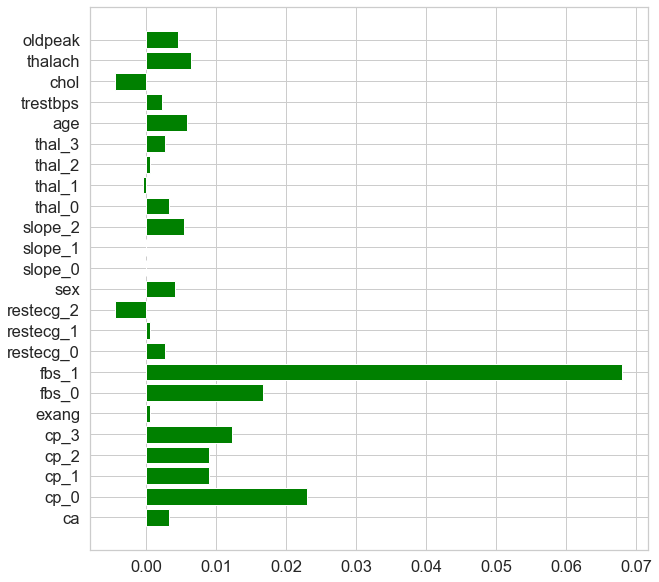

In [1613]:
from matplotlib import pyplot
# importance=model.coef_.flatten()
# pyplot.rcParams["figure.figsize"]=(10,10)
# pyplot.barh(cat_cols+numeric_cols, importance, color='g')
# pyplot.show()
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model, x_test, y_test ,n_repeats=10, random_state=42, n_jobs=2
)

log_importances = pd.Series(result.importances_mean, index=cat_cols+numeric_cols)
pyplot.rcParams["figure.figsize"]=(10,10)
pyplot.barh(cat_cols+numeric_cols, log_importances, color='g')
pyplot.show()

In [1614]:
y_predication_log_norm = model.predict(x_test)
Log= accuracy_score(y_test, y_predication_log_norm)
print(classification_report(y_test, y_predication_log_norm))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        90
           1       0.88      0.90      0.89       132

    accuracy                           0.87       222
   macro avg       0.87      0.86      0.86       222
weighted avg       0.87      0.87      0.87       222



In [1615]:
predicted = cross_validate(model, x, y, cv=10)
score_log=predicted['test_score'].mean()
score_log

c:\Users\Sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

0.8633043922369765

<AxesSubplot:>

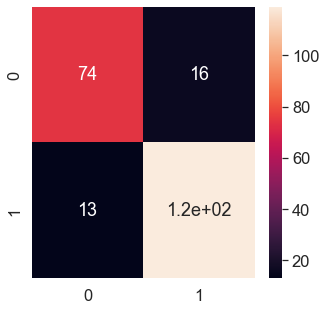

In [1616]:
cnf_matrix = confusion_matrix(y_test, y_predication_log_norm)
plt.figure(figsize=(5,5))
sns.heatmap(cnf_matrix, annot=True)

In [1617]:
sensitivity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Sensitivity : ', sensitivity )

specificity = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.8222222222222222
Specificity :  0.9015151515151515


### Data split using Cross validation

# _____________________________________________________

<img src="https://static.packt-cdn.com/products/9781789617740/graphics/assets/da18d7be-8cc3-4aa7-a092-e74201a63185.png" width="900" height="500"> 

#### Split the data using cross-Validation

In [1618]:
x1=x2.to_numpy()
y1=y2.to_numpy()
kf = KFold(n_splits=10)
kf.get_n_splits(x1)
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(x1):
    print('TRAIN:', train_index, 'TEST:', test_index)
    xs_train, xs_test = x1[train_index], x1[test_index]
    ys_train, ys_test = y1[train_index], y1[test_index]

TRAIN: [ 89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333

In [1619]:
x1_rfe=x_rfe.to_numpy()
y1_rfe=y_rfe.to_numpy()
kf = KFold(n_splits=10)
kf.get_n_splits(x1_rfe)
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(x1_rfe):
    print('TRAIN:', train_index, 'TEST:', test_index)
    xs_train_rfe, xs_test_rfe = x1_rfe[train_index], x1_rfe[test_index]
    ys_train_rfe, ys_test_rfe = y1_rfe[train_index], y1_rfe[test_index]


TRAIN: [ 89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333

In [1620]:
xs_train_logG = xs_train.copy()
xs_test_logG  = xs_test.copy()
ys_train_logG =ys_train.copy()
ys_test_logG =ys_test.copy()
######
xs_train_knn = xs_train.copy()
xs_test_knn  = xs_test.copy()
ys_train_knn =ys_train.copy()
ys_test_knn =ys_test.copy()
######
xs_train_knnG = xs_train.copy()
xs_test_knnG  = xs_test.copy()
ys_train_knnG =ys_train.copy()
ys_test_knnG =ys_test.copy()
######
xs_train_dt = xs_train.copy()
xs_test_dt  = xs_test.copy()
ys_train_dt =ys_train.copy()
ys_test_dt =ys_test.copy()
######
xs_train_dtG = xs_train.copy()
xs_test_dtG  = xs_test.copy()
ys_train_dtG =ys_train.copy()
ys_test_dtG =ys_test.copy()

### Cross validation split for NB without the correlated data

In [1621]:
x_ind=x_naivebayes.to_numpy()
y_ind=y_naivebayes.to_numpy()
kf = KFold(n_splits=10)
kf.get_n_splits(x_ind)
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index_1, test_index_1 in kf.split(x_ind):
    print('TRAIN:', train_index, 'TEST:', test_index)
    xs_train_ind, xs_test_ind = x_ind[train_index_1], x_ind[test_index_1]
    ys_train_ind, ys_test_ind = y_ind[train_index_1], y_ind[test_index_1]

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

### Cross validation split for NB with the correlated data

In [1622]:
x_dep=x_naivebayes_dep.to_numpy()
y_dep=y_naivebayes_dep.to_numpy()
kf = KFold(n_splits=10)
kf.get_n_splits(x_dep)
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index_2, test_index_2 in kf.split(x_dep):
    print('TRAIN:', train_index, 'TEST:', test_index)
    xs_train_dep, xs_test_dep = x_dep[train_index_2], x_dep[test_index_2]
    ys_train_dep, ys_test_dep = y_dep[train_index_2], y_dep[test_index_2]

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

#### Logicstic regression smote and data split cross validation (paper) 

In [1623]:
from imblearn.pipeline import Pipeline as imbpipeline
pipeline_log_smote = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', LogisticRegression(random_state=1234,
                                                                  max_iter=100)]])

In [1624]:
pipeline_log_smote.fit(xs_train,ys_train)

Pipeline(steps=[('smote', SMOTE(random_state=11)), ('scaler', StandardScaler()),
                ['classifier', LogisticRegression(random_state=1234)]])

In [1625]:
y_predicate_log_smote = pipeline_log_smote.predict(xs_test)
Log_paper= accuracy_score(ys_test, y_predicate_log_smote)
print(classification_report(ys_test, y_predicate_log_smote))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        39
           1       0.88      0.90      0.89        49

    accuracy                           0.88        88
   macro avg       0.87      0.87      0.87        88
weighted avg       0.87      0.88      0.87        88



<AxesSubplot:>

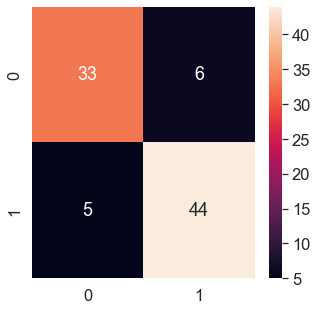

In [1626]:
matrix_paper_log_smote = confusion_matrix(ys_test,y_predicate_log_smote)
plt.figure(figsize=(5,5))
sns.heatmap(matrix_paper_log_smote, annot=True)

#### Logicstic regression Smote & split cross validation & grid search 

In [1627]:
pipelinelogg = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', LogisticRegression()]])

param_grid = {'classifier__C':[ 0.01, 0.1,1,10, 100, 1000]}

grid_search = GridSearchCV(estimator=pipelinelogg,
                           param_grid=param_grid,
                           scoring= 'accuracy',
                           n_jobs=-1)
                       

In [1628]:
grid_search.fit(xs_train_logG,ys_train_logG)

GridSearchCV(estimator=Pipeline(steps=[['smote', SMOTE(random_state=11)],
                                       ['scaler', StandardScaler()],
                                       ['classifier', LogisticRegression()]]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [1629]:
grid_search.best_params_    

{'classifier__C': 1}

### Feature importance

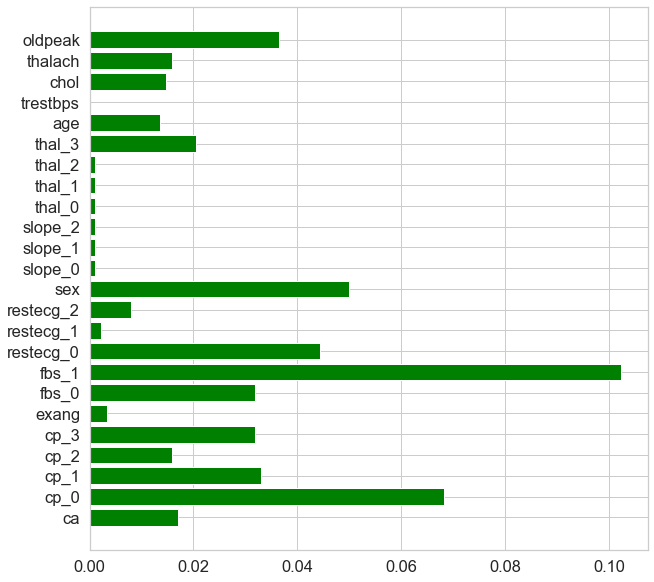

In [1630]:
# from matplotlib import pyplot
# importance=grid_search.best_estimator_.named_steps["classifier"].coef_[0]
# pyplot.rcParams["figure.figsize"]=(10,10)
# pyplot.barh(cat_cols+numeric_cols, importance, color='g')
# pyplot.show()

from sklearn.inspection import permutation_importance

result = permutation_importance(
    grid_search, xs_test_logG, ys_test_logG ,n_repeats=10, random_state=42, n_jobs=2
)

_importances = pd.Series(result.importances_mean, index=cat_cols+numeric_cols)
pyplot.rcParams["figure.figsize"]=(10,10)
pyplot.barh(cat_cols+numeric_cols, _importances, color='g')
pyplot.show()

In [1631]:
y_pred_logg_grid = grid_search.best_estimator_.predict(xs_test_logG)
Log_grid= accuracy_score(ys_test_logG, y_pred_logg_grid)
print(classification_report(ys_test_logG, y_pred_logg_grid))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        39
           1       0.88      0.90      0.89        49

    accuracy                           0.88        88
   macro avg       0.87      0.87      0.87        88
weighted avg       0.87      0.88      0.87        88



<AxesSubplot:>

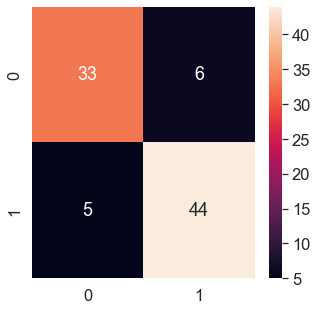

In [1632]:
cnf_matrix_log_grid = confusion_matrix(ys_test_logG, y_pred_logg_grid)
plt.figure(figsize=(5,5))
sns.heatmap(cnf_matrix_log_grid, annot=True)

In [1633]:
sensitivitylogsmoteG = cnf_matrix_log_grid[0,0]/(cnf_matrix_log_grid[0,0]+cnf_matrix_log_grid[0,1])
print('Sensitivity : ', sensitivitylogsmoteG )

specificity1G = cnf_matrix_log_grid[1,1]/(cnf_matrix_log_grid[1,0]+cnf_matrix_log_grid[1,1])
print('Specificity : ', specificity1G)

Sensitivity :  0.8461538461538461
Specificity :  0.8979591836734694


#### Naive Bayes [corr features removed]


In [1634]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()


In [1635]:
x_train_naivebayes, x_test_naivebayes,y_train_naivebayes,y_test_naivebayes = train_test_split(x_naivebayes,y_naivebayes,test_size=0.25)

In [1636]:
NB.fit(x_train_naivebayes, y_train_naivebayes)
y_pred_NB = NB.predict(x_test_naivebayes)
NB_corr_removed= accuracy_score(y_test_naivebayes, y_pred_NB)
print(classification_report(y_test_naivebayes, y_pred_NB))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74        97
           1       0.82      0.73      0.77       125

    accuracy                           0.76       222
   macro avg       0.76      0.76      0.76       222
weighted avg       0.76      0.76      0.76       222



In [1637]:
predicted_NB = cross_validate(NB, x_naivebayes, y_naivebayes, cv=10)
score_NB=predicted_NB['test_score'].mean()
score_NB

0.7920709908069459

<AxesSubplot:>

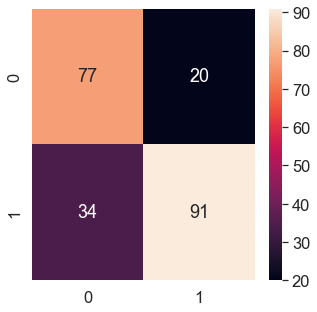

In [1638]:
cnf_matrixnaiveB = confusion_matrix(y_test_naivebayes, y_pred_NB)
plt.figure(figsize=(5,5))
sns.heatmap(cnf_matrixnaiveB, annot=True)

In [1639]:
sensitivitynaive = cnf_matrixnaiveB[0,0]/(cnf_matrixnaiveB[0,0]+cnf_matrixnaiveB[0,1])
print('Sensitivity : ', sensitivitynaive )

specificitynaive = cnf_matrixnaiveB[1,1]/(cnf_matrixnaiveB[1,0]+cnf_matrixnaiveB[1,1])
print('Specificity : ', specificitynaive)

Sensitivity :  0.7938144329896907
Specificity :  0.728


#### Naive Bayes [correlated features included]

In [1640]:
from sklearn.naive_bayes import GaussianNB
NB_dep = GaussianNB()

In [1641]:
x_train_naivebayes_dep, x_test_naivebayes_dep,y_train_naivebayes_dep,y_test_naivebayes_dep = train_test_split(x_naivebayes_dep , y_naivebayes_dep , test_size=0.25)

In [1642]:
NB_dep.fit(x_train_naivebayes_dep , y_train_naivebayes_dep)
y_pred_NB_dep = NB_dep.predict(x_test_naivebayes_dep)
NB_corr= accuracy_score(y_test_naivebayes_dep, y_pred_NB_dep)
print(classification_report(y_test_naivebayes_dep, y_pred_NB_dep))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       106
           1       0.81      0.83      0.82       116

    accuracy                           0.81       222
   macro avg       0.81      0.81      0.81       222
weighted avg       0.81      0.81      0.81       222



In [1643]:
predicted_NB_dep = cross_validate(NB_dep, x_naivebayes_dep, y_naivebayes_dep, cv=10)
score_NB_dep=predicted_NB_dep['test_score'].mean()
score_NB_dep

0.8236976506639427

<AxesSubplot:>

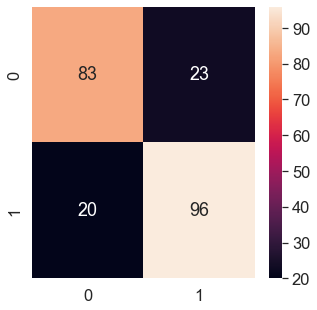

In [1644]:
cnf_matrixnaiveB_dep = confusion_matrix(y_test_naivebayes_dep, y_pred_NB_dep)
plt.figure(figsize=(5,5))
sns.heatmap(cnf_matrixnaiveB_dep, annot=True)

In [1645]:
sensitivitynaive_dep = cnf_matrixnaiveB_dep[0,0]/(cnf_matrixnaiveB_dep[0,0]+cnf_matrixnaiveB_dep[0,1])
print('Sensitivity : ', sensitivitynaive_dep )

specificitynaive_dep = cnf_matrixnaiveB_dep[1,1]/(cnf_matrixnaiveB_dep[1,0]+cnf_matrixnaiveB_dep[1,1])
print('Specificity : ', specificitynaive_dep)

Sensitivity :  0.7830188679245284
Specificity :  0.8275862068965517


### feature selection

In [1703]:
pipelinelg_feature = imbpipeline(steps = [ ['smote',SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['feature', RFE(estimator=LogisticRegression(random_state=1234, max_iter=100,C=1), )]])

para_f1 = {'feature__n_features_to_select':list(range(1, 24)),}
gs_f1 = GridSearchCV(estimator=pipelinelg_feature, 
                 param_grid=para_f1,    
                 verbose=1, 
                 scoring='accuracy')                                

In [1704]:
gs_f1.fit(xs_train, ys_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(estimator=Pipeline(steps=[['smote', SMOTE(random_state=11)],
                                       ['scaler', StandardScaler()],
                                       ['feature',
                                        RFE(estimator=LogisticRegression(C=1,
                                                                         random_state=1234))]]),
             param_grid={'feature__n_features_to_select': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22,
                                                           23]},
             scoring='accuracy', verbose=1)

In [1706]:
y_pred_feature = gs_f1.predict(xs_test)
log_feature= accuracy_score(ys_test, y_pred_feature)
print(classification_report(ys_test, y_pred_feature))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.90      0.88      0.89        49

    accuracy                           0.88        88
   macro avg       0.87      0.87      0.87        88
weighted avg       0.88      0.88      0.88        88



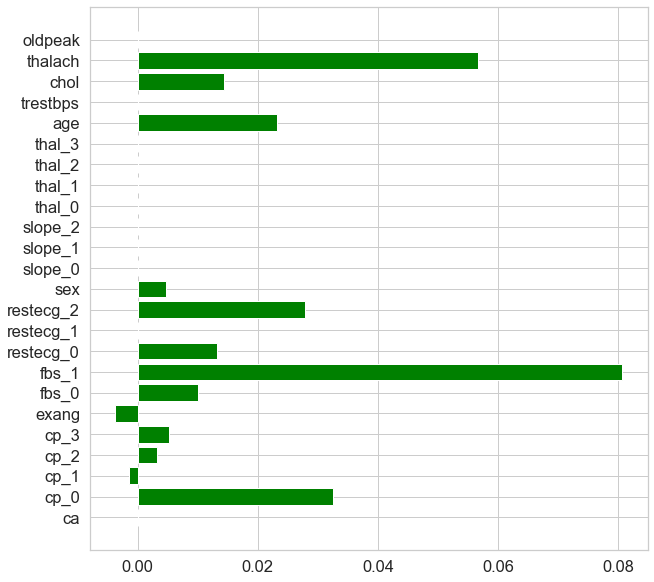

In [1707]:
from sklearn.inspection import permutation_importance
cate=	['age'	,'sex'	,'cp'	,'trestbps'	,'chol'	,'fbs'	,'restecg'	,'thalach'	,'exang'	,'oldpeak','slope','ca'	,'thal']
result = permutation_importance(
    gs_f1, xs_train, ys_train ,n_repeats=10, random_state=42, n_jobs=2
)
_importances = pd.Series(result.importances_mean, index=cat_cols+numeric_cols)
pyplot.rcParams["figure.figsize"]=(10,10)
pyplot.barh(cat_cols+numeric_cols, _importances, color='g')
pyplot.show()

<AxesSubplot:>

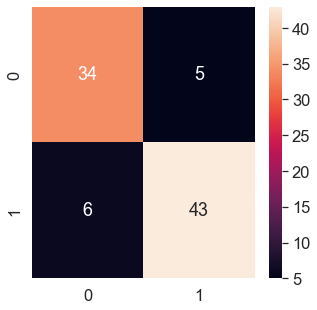

In [1716]:
matrix_gs_1 = confusion_matrix(ys_test, y_pred_feature)
plt.figure(figsize=(5,5))
sns.heatmap(matrix_gs_1, annot=True)

In [1719]:
sensitivityf1 = matrix_gs_1[0,0]/(matrix_gs_1[0,0]+matrix_gs_1[0,1])
print('Sensitivity : ', sensitivityf1 )

specificitynaivef1 = matrix_gs_1[1,1]/(matrix_gs_1[1,0]+matrix_gs_1[1,1])
print('Specificity : ', specificitynaivef1)

Sensitivity :  0.8717948717948718
Specificity :  0.8775510204081632


In [1708]:
pipelinelg_feature = imbpipeline(steps = [ ['smote',SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['feature', RFE(estimator=LogisticRegression(random_state=1234, max_iter=100,C=1), )]])

para_f1 = {'feature__n_features_to_select':[1,2,3,4,5,6,7,8,9,10,11,12,13],}
gs_f2 = GridSearchCV(estimator=pipelinelg_feature, 
                 param_grid=para_f1,    
                 verbose=1, 
                 scoring='accuracy')     

In [1709]:
gs_f2.fit(xs_train_rfe, ys_train_rfe)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(estimator=Pipeline(steps=[['smote', SMOTE(random_state=11)],
                                       ['scaler', StandardScaler()],
                                       ['feature',
                                        RFE(estimator=LogisticRegression(C=1,
                                                                         random_state=1234))]]),
             param_grid={'feature__n_features_to_select': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12,
                                                           13]},
             scoring='accuracy', verbose=1)

In [1711]:
y_pred_feature_rfe = gs_f2.predict(xs_test_rfe)
log_feature_rfe= accuracy_score(ys_test_rfe, y_pred_feature_rfe)
print(classification_report(ys_test_rfe, y_pred_feature_rfe))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        39
           1       0.86      0.88      0.87        49

    accuracy                           0.85        88
   macro avg       0.85      0.85      0.85        88
weighted avg       0.85      0.85      0.85        88



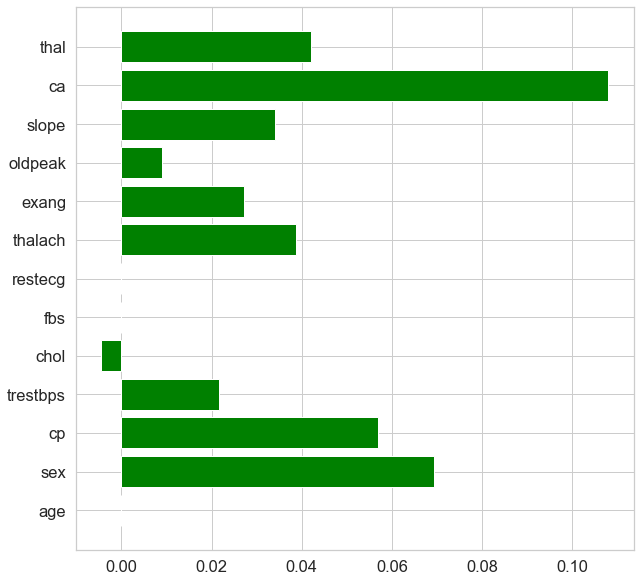

In [1712]:
from sklearn.inspection import permutation_importance
cate=	['age'	,'sex'	,'cp'	,'trestbps'	,'chol'	,'fbs'	,'restecg'	,'thalach'	,'exang'	,'oldpeak','slope','ca'	,'thal']
result = permutation_importance(
    gs_f2, xs_test_rfe, ys_test_rfe ,n_repeats=10, random_state=42, n_jobs=2
)
_importances = pd.Series(result.importances_mean, index=cate)
pyplot.rcParams["figure.figsize"]=(10,10)
pyplot.barh(cate, _importances, color='g')
pyplot.show()

<AxesSubplot:>

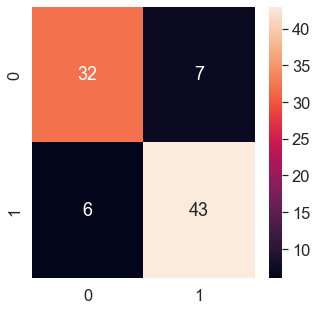

In [1713]:
matrix_gs_2 = confusion_matrix(ys_test_rfe, y_pred_feature_rfe)
plt.figure(figsize=(5,5))
sns.heatmap(matrix_gs_2, annot=True)

In [1717]:
sensitivityf2 = matrix_gs_2[0,0]/(matrix_gs_2[0,0]+matrix_gs_2[0,1])
print('Sensitivity : ', sensitivityf2 )

specificitynaivef2 = matrix_gs_2[1,1]/(matrix_gs_2[1,0]+matrix_gs_2[1,1])
print('Specificity : ', specificitynaivef2)

Sensitivity :  0.8205128205128205
Specificity :  0.8775510204081632


#### Naive Bayes Smote & cross validation data split (corr included)

In [1653]:
pipelineNB = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['naivebayes', GaussianNB()]])



In [1654]:
pipelineNB.fit(xs_train_dep,ys_train_dep)

Pipeline(steps=[('smote', SMOTE(random_state=11)), ('scaler', StandardScaler()),
                ['naivebayes', GaussianNB()]])

In [1655]:
y_pred_NB_SMOTE = pipelineNB.predict(xs_test_dep)
NB_Smote_corr= accuracy_score(ys_test_dep, y_pred_NB_SMOTE)
print(classification_report(ys_test_dep, y_pred_NB_SMOTE))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76        39
           1       0.79      0.90      0.84        49

    accuracy                           0.81        88
   macro avg       0.81      0.80      0.80        88
weighted avg       0.81      0.81      0.80        88



<AxesSubplot:>

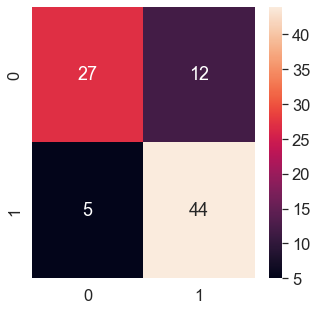

In [1656]:
matrix_NB_SMOTE = confusion_matrix(ys_test_dep, y_pred_NB_SMOTE)
plt.figure(figsize=(5,5))
sns.heatmap(matrix_NB_SMOTE, annot=True)

In [1657]:
sensitivitynaive_dep_smote = matrix_NB_SMOTE[0,0]/(matrix_NB_SMOTE[0,0]+matrix_NB_SMOTE[0,1])
print('Sensitivity : ', sensitivitynaive_dep_smote )

specificitynaive_dep_smote = matrix_NB_SMOTE[1,1]/(matrix_NB_SMOTE[1,0]+matrix_NB_SMOTE[1,1])
print('Specificity : ', specificitynaive_dep_smote)

Sensitivity :  0.6923076923076923
Specificity :  0.8979591836734694


#### Naive Bayes Smote & cross validation data split (corr not included)

In [1658]:
pipelineNB_ind = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['naivebayes', GaussianNB()]])

In [1659]:
pipelineNB_ind.fit(xs_train_ind,ys_train_ind)

Pipeline(steps=[('smote', SMOTE(random_state=11)), ('scaler', StandardScaler()),
                ['naivebayes', GaussianNB()]])

In [1660]:
y_pred_NB_SMOTE_ind = pipelineNB_ind.predict(xs_test_ind)
NB_Smote_dep= accuracy_score(ys_test_ind, y_pred_NB_SMOTE_ind)
print(classification_report(ys_test_ind, y_pred_NB_SMOTE_ind))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68        39
           1       0.75      0.78      0.76        49

    accuracy                           0.73        88
   macro avg       0.72      0.72      0.72        88
weighted avg       0.73      0.73      0.73        88



<AxesSubplot:>

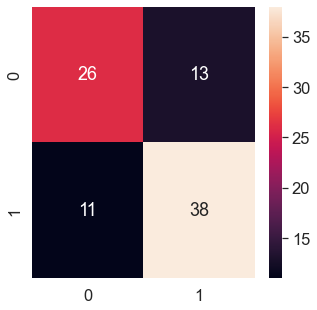

In [1661]:
matrix_NB_SMOTE_ind = confusion_matrix(ys_test_ind, y_pred_NB_SMOTE_ind)
plt.figure(figsize=(5,5))
sns.heatmap(matrix_NB_SMOTE_ind, annot=True)

In [1662]:
sensitivitynaive_ind_smote = matrix_NB_SMOTE_ind[0,0]/(matrix_NB_SMOTE_ind[0,0]+matrix_NB_SMOTE_ind[0,1])
print('Sensitivity : ', sensitivitynaive_ind_smote )

specificitynaive_ind_smote = matrix_NB_SMOTE_ind[1,1]/(matrix_NB_SMOTE_ind[1,0]+matrix_NB_SMOTE_ind[1,1])
print('Specificity : ', specificitynaive_ind_smote)

Sensitivity :  0.6666666666666666
Specificity :  0.7755102040816326


#### NB Gridsearch & split cross validation with smote with corr variables

In [1663]:
pipelineNB_grid = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['naivebayes', GaussianNB()]])
params_NB = {'naivebayes__var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=pipelineNB_grid, 
                 param_grid=params_NB,    
                 verbose=1, 
                 scoring='accuracy') 

In [1664]:
gs_NB.fit(xs_test_dep,ys_test_dep)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=Pipeline(steps=[['smote', SMOTE(random_state=11)],
                                       ['scaler', StandardScaler()],
                                       ['naivebayes', GaussianNB()]]),
             param_grid={'naivebayes__var_smoothing': array([1.000e+00, 8.111e-01, 6.579e-01, 5.337e-01, 4.329e-01, 3.511e-01,
       2.848e-01, 2.310e-01, 1.874e-01, 1.520e-01, 1.233e-01, 1.000e-01,
       8.111e-02, 6.579e-02, 5.337e-02, 4.329e-02, 3.511e-02, 2.8...
       1.000e-06, 8.111e-07, 6.579e-07, 5.337e-07, 4.329e-07, 3.511e-07,
       2.848e-07, 2.310e-07, 1.874e-07, 1.520e-07, 1.233e-07, 1.000e-07,
       8.111e-08, 6.579e-08, 5.337e-08, 4.329e-08, 3.511e-08, 2.848e-08,
       2.310e-08, 1.874e-08, 1.520e-08, 1.233e-08, 1.000e-08, 8.111e-09,
       6.579e-09, 5.337e-09, 4.329e-09, 3.511e-09, 2.848e-09, 2.310e-09,
       1.874e-09, 1.520e-09, 1.233e-09, 1.000e-09])},
             scoring='accuracy', verbose=1)

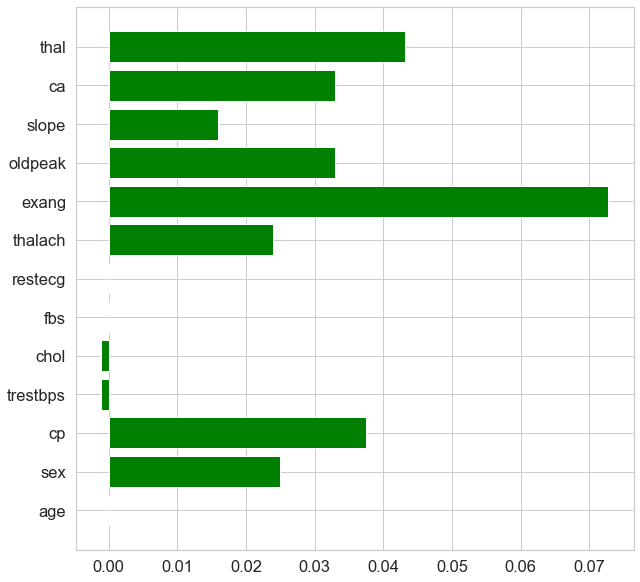

In [1665]:
from sklearn.inspection import permutation_importance
cate=	['age'	,'sex'	,'cp'	,'trestbps'	,'chol'	,'fbs'	,'restecg'	,'thalach'	,'exang'	,'oldpeak','slope','ca'	,'thal']
result = permutation_importance(
    gs_NB, xs_test_dep, ys_test_dep ,n_repeats=10, random_state=42, n_jobs=2
)
_importances = pd.Series(result.importances_mean, index=cate)
pyplot.rcParams["figure.figsize"]=(10,10)
pyplot.barh(cate, _importances, color='g')
pyplot.show()

In [1666]:
pipelinelg_feature = imbpipeline(steps = [
                                ['scaler', StandardScaler()],
                                ['feature', RFE(estimator=LogisticRegression(random_state=1234, max_iter=100), n_features_to_select=8)]])

# rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3)
# fit = rfe.fit(xs_train_rfe, ys_train_rfe)

In [1667]:
y_predNB_grid = gs_NB.best_estimator_.predict(xs_test_dep)
NB_Smote_dep_grid= accuracy_score(ys_test_dep, y_predNB_grid)
print(classification_report(ys_test_dep, y_predNB_grid))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        39
           1       0.83      0.92      0.87        49

    accuracy                           0.85        88
   macro avg       0.86      0.84      0.85        88
weighted avg       0.86      0.85      0.85        88



<AxesSubplot:>

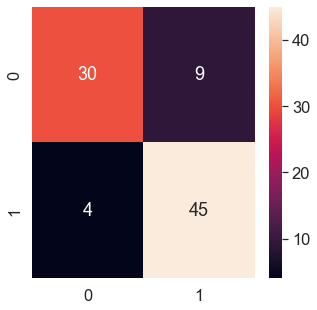

In [1668]:
cnf_matrix_grid_nb = confusion_matrix(ys_test_dep, y_predNB_grid)
plt.figure(figsize=(5,5))
sns.heatmap(cnf_matrix_grid_nb, annot=True)

In [1669]:
sensitivity_nb_grid = cnf_matrix_grid_nb[0,0]/(cnf_matrix_grid_nb[0,0]+cnf_matrix_grid_nb[0,1])
print('Sensitivity : ', sensitivity_nb_grid )

specificity1Gridnb = cnf_matrix_grid_nb[1,1]/(cnf_matrix_grid_nb[1,0]+cnf_matrix_grid_nb[1,1])
print('Specificity : ', specificity1Gridnb)

Sensitivity :  0.7692307692307693
Specificity :  0.9183673469387755


In [1670]:
gs_NB.best_params_

{'naivebayes__var_smoothing': 1.0}

#### KNN

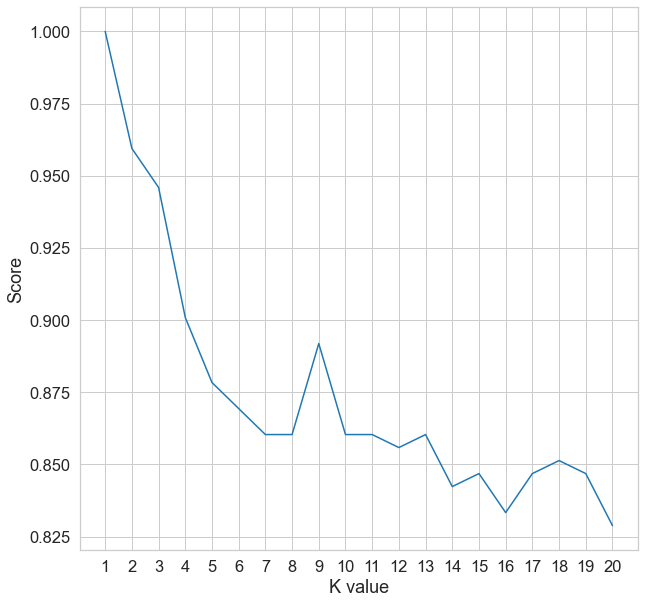

Maximum KNN Score is 100.00%
K Value with highest score:  1


<Figure size 576x576 with 0 Axes>

In [1671]:
scoreList = []
for i in range(1,21):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train_knn, y_train_knn)
    scoreList.append(knn2.score(x_test_knn, y_test_knn))
    
plt.plot(range(1,21), scoreList)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
plt.figure(figsize=(8,8))
acc = np.max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))
print("K Value with highest score: ", (scoreList.index(np.max(scoreList))+1))


In [1672]:
k=KNeighborsClassifier(n_neighbors=1)
k.fit(x_train_knn,y_train_knn)
knn_pred= k.predict(x_test_knn)

print(classification_report(y_test_knn, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       132

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



#### KNN with smote, cross validation split (paper)

In [1673]:
pipelineknn = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['knn', KNeighborsClassifier(n_neighbors=2, leaf_size = 40)]]) 

In [1674]:
pipelineknn.fit(xs_train_knn, ys_train_knn)

Pipeline(steps=[('smote', SMOTE(random_state=11)), ('scaler', StandardScaler()),
                ['knn', KNeighborsClassifier(leaf_size=40, n_neighbors=2)]])

In [1675]:
y_pred_knn_SMOTE = pipelineknn.predict(xs_test_knn)
KNN_smote_acc= accuracy_score(ys_test_knn, y_pred_knn_SMOTE)
print(classification_report(ys_test_knn, y_pred_knn_SMOTE))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.96      0.98        49

    accuracy                           0.98        88
   macro avg       0.98      0.98      0.98        88
weighted avg       0.98      0.98      0.98        88



<AxesSubplot:>

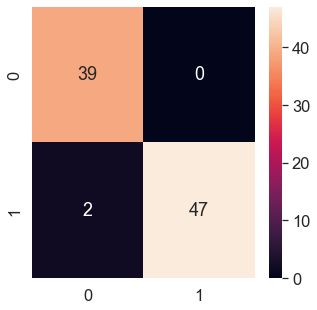

In [1676]:

matrix_knn_SMOTE = confusion_matrix(ys_test_knn, y_pred_knn_SMOTE)
plt.figure(figsize=(5,5))
sns.heatmap(matrix_knn_SMOTE, annot=True)

In [1677]:
sensitivity_KNN_smote = matrix_knn_SMOTE[0,0]/(matrix_knn_SMOTE[0,0]+matrix_knn_SMOTE[0,1])
print('Sensitivity : ', sensitivity_KNN_smote )

specificity_KNN_smote = matrix_knn_SMOTE[1,1]/(matrix_knn_SMOTE[1,0]+matrix_knn_SMOTE[1,1])
print('Specificity : ', specificity_KNN_smote)

Sensitivity :  1.0
Specificity :  0.9591836734693877


#### KNN, Smote and grid Search

In [1678]:
k_range = list(range(1, 10))
param_grid_knn = dict(knn__n_neighbors=k_range)
# param_grid_knn = {
#     'knn__n_neighbors': [2,5,15, 30, 45, 64]
# }

pipelineknnG = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['knn', KNeighborsClassifier()]])  
grid_search_knn = GridSearchCV(estimator=pipelineknnG,
                           param_grid=param_grid_knn,
                           scoring='accuracy',
                           n_jobs=-1)


In [1679]:
grid_search_knn.fit(xs_train_knnG,ys_train_knnG)

GridSearchCV(estimator=Pipeline(steps=[['smote', SMOTE(random_state=11)],
                                       ['scaler', StandardScaler()],
                                       ['knn', KNeighborsClassifier()]]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [1680]:
grid_search_knn.best_params_

{'knn__n_neighbors': 1}

In [1681]:
y_predKNN_grid = grid_search_knn.best_estimator_.predict(xs_test_knnG)
KNN_smote_grid_acc= accuracy_score(ys_test_knnG, y_predKNN_grid)
print(classification_report(ys_test_knnG, y_predKNN_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        49

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



<AxesSubplot:>

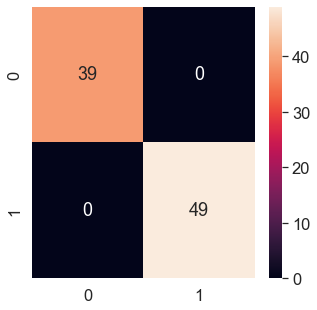

In [1682]:
y_predict_knnG=grid_search_knn.predict(xs_test_knnG)
matrix_knn_SMOTEGG = confusion_matrix(ys_test_knnG, y_predict_knnG)
plt.figure(figsize=(5,5))
sns.heatmap(matrix_knn_SMOTEGG, annot=True)

#### Decision Tree 

In [1683]:
clf_model = DecisionTreeClassifier()   
clf_model.fit(x_train_dt,y_train_dt)



DecisionTreeClassifier()

In [1684]:
test_predict_dt = clf_model.predict(x_test_dt)
DT_acc= accuracy_score(y_test_dt, test_predict_dt)
print(classification_report(y_test_dt, test_predict_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       132

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



<AxesSubplot:>

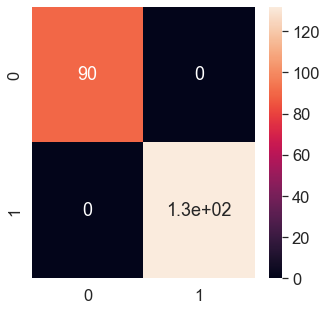

In [1685]:
matrix_dt = confusion_matrix (y_test_dt, test_predict_dt)

plt.figure(figsize=(5,5))
sns.heatmap(matrix_dt, annot=True)

In [1686]:
sensitivitydt = matrix_dt[0,0]/(matrix_dt[0,0]+matrix_dt[0,1])
print('Sensitivity : ', sensitivitydt )

specificitydt = matrix_dt[1,1]/(matrix_dt[1,0]+matrix_dt[1,1])
print('Specificity : ', specificitydt)

Sensitivity :  1.0
Specificity :  1.0


### DT with smote and cross validation split (paper)

In [1687]:
pipelinedt = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', DecisionTreeClassifier(max_depth=7)]])

In [1688]:
pipelinedt.fit(xs_train_dt,ys_train_dt)

Pipeline(steps=[('smote', SMOTE(random_state=11)), ('scaler', StandardScaler()),
                ['classifier', DecisionTreeClassifier(max_depth=7)]])

In [1689]:
y_pred_dt_SMOTE = pipelinedt.predict(xs_test_dt)
DT_smote_acc= accuracy_score(ys_test_dt, y_pred_dt_SMOTE)
print(classification_report(ys_test_dt, y_pred_dt_SMOTE))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.98      1.00      0.99        49

    accuracy                           0.99        88
   macro avg       0.99      0.99      0.99        88
weighted avg       0.99      0.99      0.99        88



<AxesSubplot:>

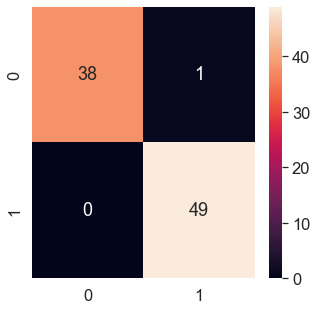

In [1690]:
matrix_DT_SMOTE = confusion_matrix(ys_test_dt, y_pred_dt_SMOTE)
plt.figure(figsize=(5,5))
sns.heatmap(matrix_DT_SMOTE, annot=True)

In [1691]:
sensitivity_DT_smote = matrix_DT_SMOTE[0,0]/(matrix_DT_SMOTE[0,0]+matrix_DT_SMOTE[0,1])
print('Sensitivity : ', sensitivity_DT_smote )

specificity_DT_smote = matrix_DT_SMOTE[1,1]/(matrix_DT_SMOTE[1,0]+matrix_DT_SMOTE[1,1])
print('Specificity : ', specificity_DT_smote)

Sensitivity :  0.9743589743589743
Specificity :  1.0


### DT cross validation, smote and grid search

In [1692]:
param_grid = {'DT__max_depth': np.arange(3, 20)}

pipelinedtG = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['DT', DecisionTreeClassifier()]])  
grid_search_dt = GridSearchCV(estimator=pipelinedtG,
                           param_grid=param_grid,
                           scoring='accuracy',
                           n_jobs=-1)

In [1693]:
grid_search_dt.fit(xs_train_dtG,ys_train_dtG)

GridSearchCV(estimator=Pipeline(steps=[['smote', SMOTE(random_state=11)],
                                       ['scaler', StandardScaler()],
                                       ['DT', DecisionTreeClassifier()]]),
             n_jobs=-1,
             param_grid={'DT__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
             scoring='accuracy')

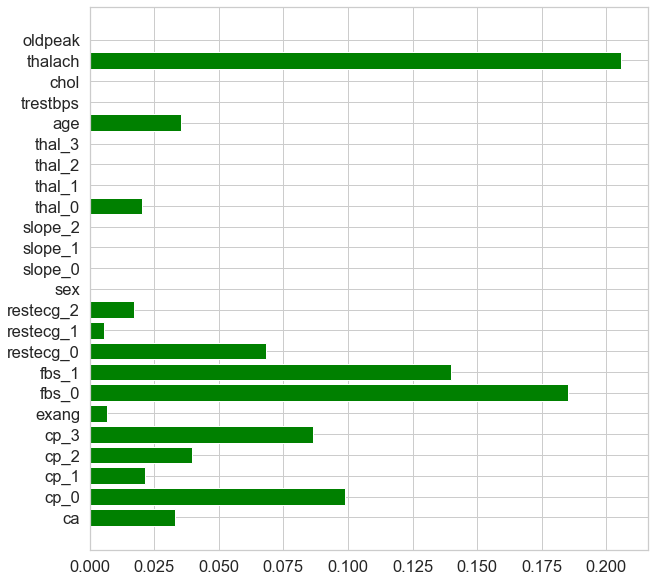

In [1694]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    grid_search_dt, xs_test_dtG, ys_test_dtG, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=cat_cols+numeric_cols)
pyplot.rcParams["figure.figsize"]=(10,10)
pyplot.barh(cat_cols+numeric_cols, forest_importances, color='g')
pyplot.show()

In [1695]:
grid_search_dt.best_params_

{'DT__max_depth': 12}

In [1696]:
y_pred_DT_grid = grid_search_dt.best_estimator_.predict(xs_test_dtG)

In [1697]:
DT_smote_acc_grid= accuracy_score(ys_test_dtG, y_pred_DT_grid)
print(classification_report(ys_test_dtG, y_pred_DT_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        49

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



<AxesSubplot:>

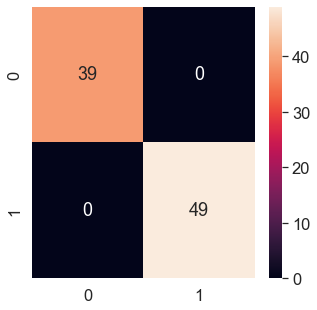

In [1698]:

matrix_DT_SMOTEG = confusion_matrix(ys_test_dtG, y_pred_DT_grid)
plt.figure(figsize=(5,5))
sns.heatmap(matrix_DT_SMOTEG, annot=True)

In [1699]:
sensitivity1 = matrix_DT_SMOTEG[0,0]/(matrix_DT_SMOTEG[0,0]+matrix_DT_SMOTEG[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = matrix_DT_SMOTEG[1,1]/(matrix_DT_SMOTEG[1,0]+matrix_DT_SMOTEG[1,1])
print('Specificity : ', specificity1)

Sensitivity :  1.0
Specificity :  1.0


#### Evaluation of Models

In [1700]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Logistic Regression Paper','Logistic Regression Grid','feature selection dummy data' ,'feature selection normal','Naive Bayes corr_removed','Naive Bayes corr_add','Naive Bayes corr_ add_ smote','Naive Bayes corr_removed_smote','Naive Bayes corr_add_grid','KNN','KNN_Smote_paper','KNN Grid','DT',
                    'DT smote paper ','DT Grid'], 'Accuracy': [Log*100,
                    Log_paper *100,Log_grid*100,log_feature*100,log_feature_rfe*100,NB_corr_removed*100,NB_corr*100,NB_Smote_corr*100,NB_Smote_dep*100,NB_Smote_dep_grid*100,acc,KNN_smote_acc*100,KNN_smote_grid_acc*100,DT_acc*100,DT_smote_acc*100,DT_smote_acc_grid*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.936937
1,Logistic Regression Paper,87.500000
2,Logistic Regression Grid,87.500000
3,feature selection dummy data,87.500000
4,feature selection normal,85.227273
5,Naive Bayes corr_removed,75.675676
6,Naive Bayes corr_add,80.630631
7,Naive Bayes corr_ add_ smote,80.681818
8,Naive Bayes corr_removed_smote,72.727273
9,Naive Bayes corr_add_grid,85.227273


### Accuarcy 

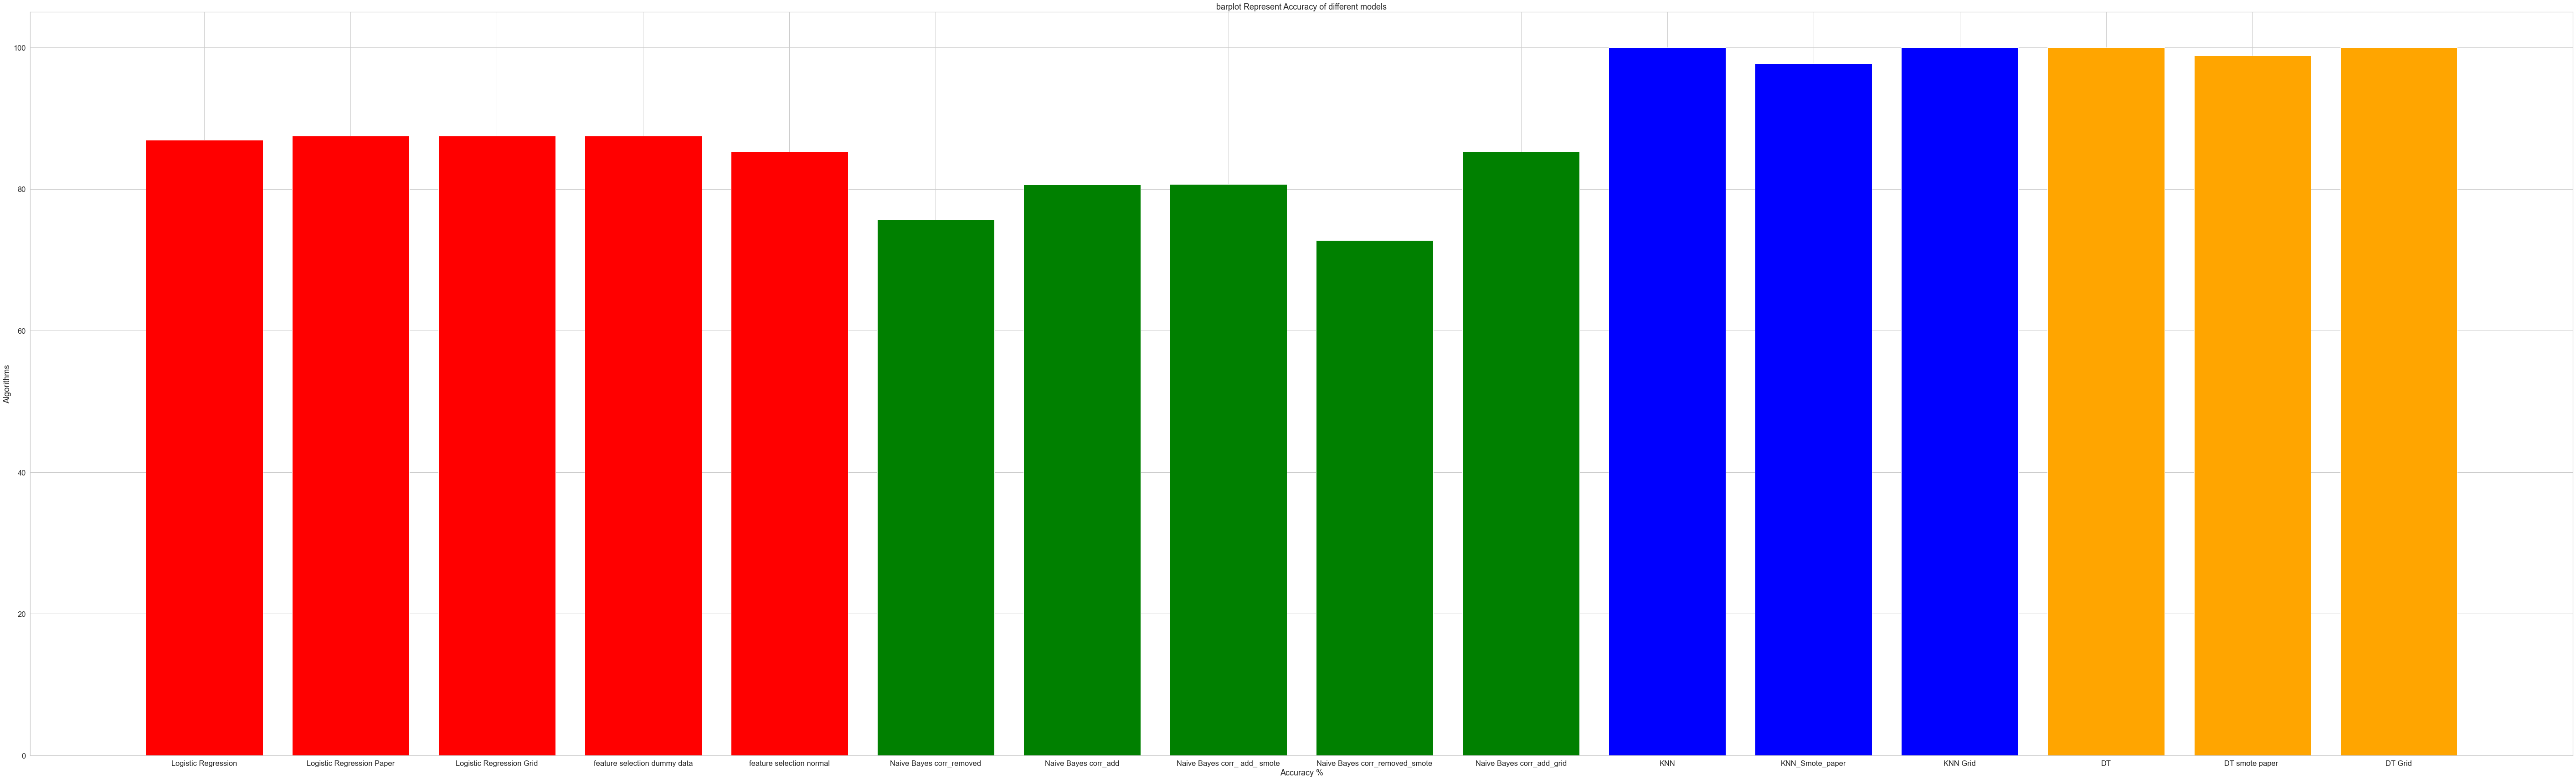

In [1701]:
colors = ['red','red','red','red','red','green','green','green','green','green','blue','blue','blue','orange','orange','orange']
plt.figure(figsize=(100,30))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

### ROC

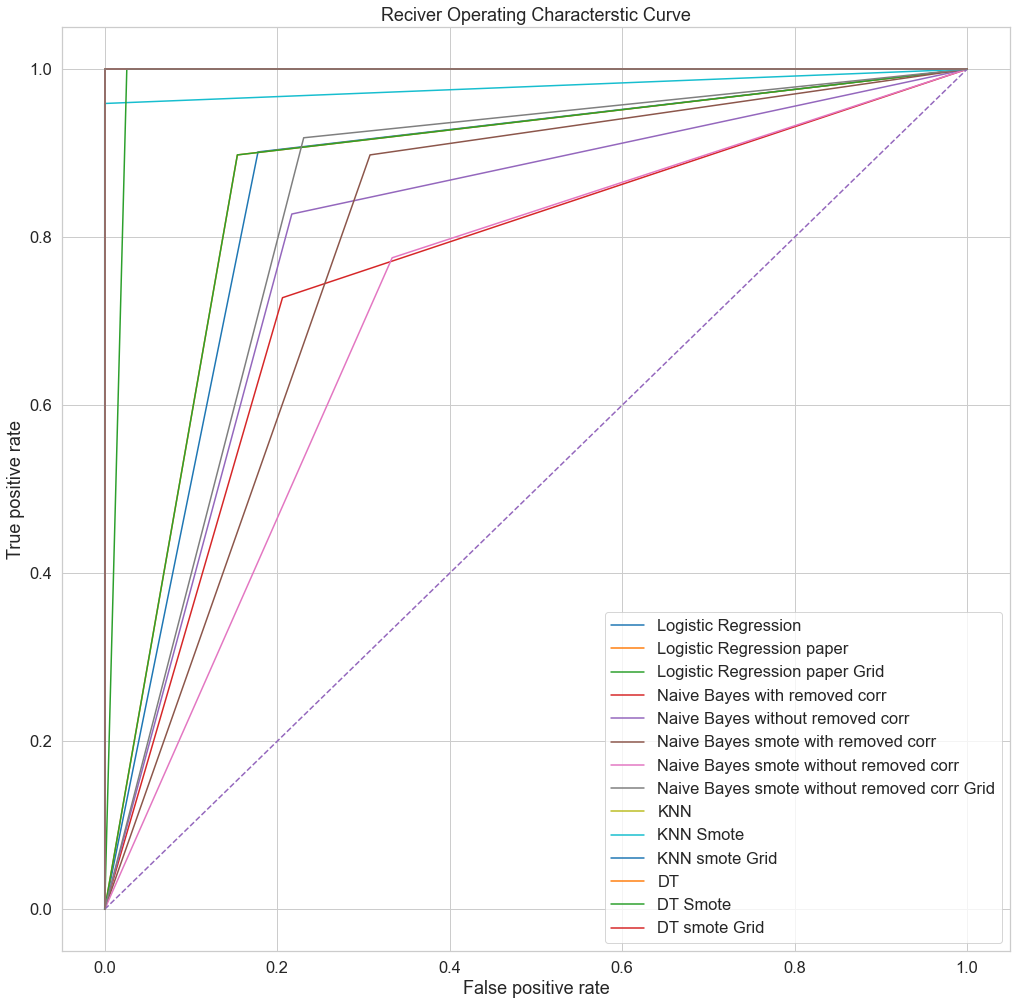

In [1702]:
from sklearn.metrics import roc_curve
Lfp,ltp,t= roc_curve(y_test,y_predication_log_norm)
lfp1,ltp1,t1 = roc_curve(ys_test,y_predicate_log_smote)
lfp2,ltp2,t2 = roc_curve(ys_test_logG,y_pred_logg_grid) 
###                                                            
nfp,ntp,n= roc_curve(y_test_naivebayes,y_pred_NB)
nfp1,ntp1,n1 = roc_curve(y_test_naivebayes_dep,y_pred_NB_dep)
nfp2,ntp2,n2 = roc_curve(ys_test_ind,y_pred_NB_SMOTE) 
nfp3,ntp3,n3 = roc_curve(ys_test_dep,y_pred_NB_SMOTE_ind) 
nfp4,ntp4,n4 = roc_curve(ys_test_dep,y_predNB_grid) 
####
kfp,ktp,k0= roc_curve(y_test_knn,knn_pred)
kfp1,ktp1,k1 = roc_curve(ys_test_knn,y_pred_knn_SMOTE)
kfp2,ktp2,k2 = roc_curve(ys_test_knnG,y_predKNN_grid)
####
dfp,dtp,d0= roc_curve(y_test_dt,test_predict_dt)
dfp1,dtp1,d1 = roc_curve(ys_test_dt,y_pred_dt_SMOTE)
dfp2,dtp2,d2 = roc_curve(ys_test_dtG,y_pred_DT_grid)

#################
sns.set_style('whitegrid')
plt.figure(figsize=(17,17))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(Lfp,ltp,label='Logistic Regression')
plt.plot(lfp1,ltp1,label='Logistic Regression paper')
plt.plot(lfp2,ltp2,label='Logistic Regression paper Grid')
plt.plot(nfp,ntp,label='Naive Bayes with removed corr')
plt.plot(nfp1,ntp1,label='Naive Bayes without removed corr')
plt.plot(nfp2,ntp2,label='Naive Bayes smote with removed corr')
plt.plot(nfp3,ntp3,label='Naive Bayes smote without removed corr')
plt.plot(nfp4,ntp4,label='Naive Bayes smote without removed corr Grid')
plt.plot(kfp,ktp,label='KNN')
plt.plot(kfp1,ktp1,label='KNN Smote')
plt.plot(kfp2,ktp2,label='KNN smote Grid')
plt.plot(dfp,dtp,label='DT')
plt.plot(dfp1,dtp1,label='DT Smote')
plt.plot(dfp2,dtp2,label='DT smote Grid')
###
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()